# Logistic Map Chaos Simulation

## Introduction

The **logistic map** is a canonical example of how complex, chaotic behavior can arise from simple nonlinear dynamical equations. It was popularized by the biologist Robert May in 1976 as a demographic model for population dynamics.

## Mathematical Formulation

The logistic map is defined by the recurrence relation:

$$x_{n+1} = r \cdot x_n (1 - x_n)$$

where:
- $x_n \in [0, 1]$ represents the population ratio at generation $n$
- $r \in [0, 4]$ is the growth rate parameter

## Dynamical Behavior

The system exhibits dramatically different behaviors depending on the value of $r$:

| Range of $r$ | Behavior |
|-------------|----------|
| $0 < r < 1$ | Population dies out |
| $1 < r < 3$ | Convergence to stable fixed point $x^* = 1 - 1/r$ |
| $3 < r < 3.449$ | Period-2 oscillation |
| $3.449 < r < 3.544$ | Period-4 oscillation |
| $r \approx 3.5699$ | Onset of chaos (Feigenbaum point) |
| $3.5699 < r \leq 4$ | Chaotic regime with periodic windows |

## Fixed Points and Stability

The fixed points satisfy $x^* = r \cdot x^* (1 - x^*)$, yielding:

$$x^*_1 = 0 \quad \text{and} \quad x^*_2 = 1 - \frac{1}{r}$$

Linear stability analysis requires computing the derivative:

$$f'(x) = r(1 - 2x)$$

A fixed point is stable when $|f'(x^*)| < 1$.

## Feigenbaum Constants

The route to chaos via period-doubling bifurcations exhibits universal scaling governed by the Feigenbaum constants:

$$\delta = \lim_{n \to \infty} \frac{r_{n-1} - r_{n-2}}{r_n - r_{n-1}} \approx 4.669$$

$$\alpha = \lim_{n \to \infty} \frac{d_{n-1}}{d_n} \approx 2.502$$

These constants are universal across all unimodal maps.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Set up publication-quality plotting
plt.rcParams.update({
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'figure.dpi': 150
})

## Implementation

We implement the logistic map iteration and generate a bifurcation diagram by computing the long-term behavior for each value of $r$.

In [2]:
def logistic_map(x, r):
    """Compute next iteration of the logistic map.
    
    Parameters
    ----------
    x : float or array
        Current population value(s) in [0, 1]
    r : float
        Growth rate parameter
    
    Returns
    -------
    float or array
        Next iteration value(s)
    """
    return r * x * (1 - x)


def iterate_logistic(r, x0, n_iterations, n_discard):
    """Iterate the logistic map and return steady-state values.
    
    Parameters
    ----------
    r : float
        Growth rate parameter
    x0 : float
        Initial condition
    n_iterations : int
        Total number of iterations
    n_discard : int
        Number of initial transient iterations to discard
    
    Returns
    -------
    array
        Steady-state values after transient
    """
    x = x0
    # Discard transient
    for _ in range(n_discard):
        x = logistic_map(x, r)
    
    # Collect steady-state values
    results = np.zeros(n_iterations - n_discard)
    for i in range(n_iterations - n_discard):
        x = logistic_map(x, r)
        results[i] = x
    
    return results

## Bifurcation Diagram Generation

The bifurcation diagram plots the attractor (long-term behavior) as a function of the parameter $r$. This reveals the period-doubling cascade leading to chaos.

In [3]:
def generate_bifurcation_data(r_min, r_max, r_steps, n_iterations, n_discard, x0=0.5):
    """Generate bifurcation diagram data.
    
    Parameters
    ----------
    r_min, r_max : float
        Range of r values
    r_steps : int
        Number of r values to sample
    n_iterations : int
        Total iterations per r value
    n_discard : int
        Transient iterations to discard
    x0 : float
        Initial condition
    
    Returns
    -------
    r_values, x_values : arrays
        Coordinates for bifurcation plot
    """
    r_values = np.linspace(r_min, r_max, r_steps)
    n_steady = n_iterations - n_discard
    
    # Pre-allocate arrays
    all_r = np.zeros(r_steps * n_steady)
    all_x = np.zeros(r_steps * n_steady)
    
    for i, r in enumerate(r_values):
        steady_state = iterate_logistic(r, x0, n_iterations, n_discard)
        idx_start = i * n_steady
        idx_end = (i + 1) * n_steady
        all_r[idx_start:idx_end] = r
        all_x[idx_start:idx_end] = steady_state
    
    return all_r, all_x


# Generate bifurcation data
print("Generating bifurcation diagram data...")
r_vals, x_vals = generate_bifurcation_data(
    r_min=2.5,
    r_max=4.0,
    r_steps=2000,
    n_iterations=1000,
    n_discard=900
)
print(f"Generated {len(r_vals)} data points")

Generating bifurcation diagram data...


Generated 200000 data points


## Time Series Analysis

We examine the time evolution for different values of $r$ to illustrate the transition from stable behavior to chaos.

In [4]:
def compute_time_series(r, x0, n_steps):
    """Compute full time series of logistic map.
    
    Parameters
    ----------
    r : float
        Growth rate parameter
    x0 : float
        Initial condition
    n_steps : int
        Number of iterations
    
    Returns
    -------
    array
        Time series including initial condition
    """
    x = np.zeros(n_steps + 1)
    x[0] = x0
    for i in range(n_steps):
        x[i + 1] = logistic_map(x[i], r)
    return x


# Representative r values for different dynamical regimes
r_examples = {
    'Fixed Point (r=2.8)': 2.8,
    'Period-2 (r=3.2)': 3.2,
    'Period-4 (r=3.5)': 3.5,
    'Chaos (r=3.9)': 3.9
}

time_series_data = {}
for name, r in r_examples.items():
    time_series_data[name] = compute_time_series(r, 0.5, 100)

## Lyapunov Exponent

The Lyapunov exponent $\lambda$ quantifies the rate of separation of infinitesimally close trajectories:

$$\lambda = \lim_{N \to \infty} \frac{1}{N} \sum_{i=0}^{N-1} \ln |f'(x_i)| = \lim_{N \to \infty} \frac{1}{N} \sum_{i=0}^{N-1} \ln |r(1 - 2x_i)|$$

- $\lambda < 0$: stable fixed point or periodic orbit
- $\lambda = 0$: marginally stable (bifurcation point)
- $\lambda > 0$: chaotic behavior

In [5]:
def compute_lyapunov_exponent(r, x0, n_iterations, n_discard):
    """Compute Lyapunov exponent for the logistic map.
    
    Parameters
    ----------
    r : float
        Growth rate parameter
    x0 : float
        Initial condition
    n_iterations : int
        Total iterations
    n_discard : int
        Transient iterations to discard
    
    Returns
    -------
    float
        Estimated Lyapunov exponent
    """
    x = x0
    # Discard transient
    for _ in range(n_discard):
        x = logistic_map(x, r)
    
    # Compute Lyapunov exponent
    lyap_sum = 0.0
    n_computed = n_iterations - n_discard
    
    for _ in range(n_computed):
        derivative = abs(r * (1 - 2 * x))
        if derivative > 0:
            lyap_sum += np.log(derivative)
        x = logistic_map(x, r)
    
    return lyap_sum / n_computed


# Compute Lyapunov exponent as function of r
print("Computing Lyapunov exponents...")
r_lyap = np.linspace(2.5, 4.0, 1000)
lyap_exponents = np.array([
    compute_lyapunov_exponent(r, 0.5, 5000, 1000) 
    for r in r_lyap
])
print("Done")

Computing Lyapunov exponents...


Done


## Visualization

We create a comprehensive figure showing:
1. The bifurcation diagram
2. Time series for different dynamical regimes
3. The Lyapunov exponent

/tmp/ipykernel_157590/4086759067.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Figure saved to plot.png


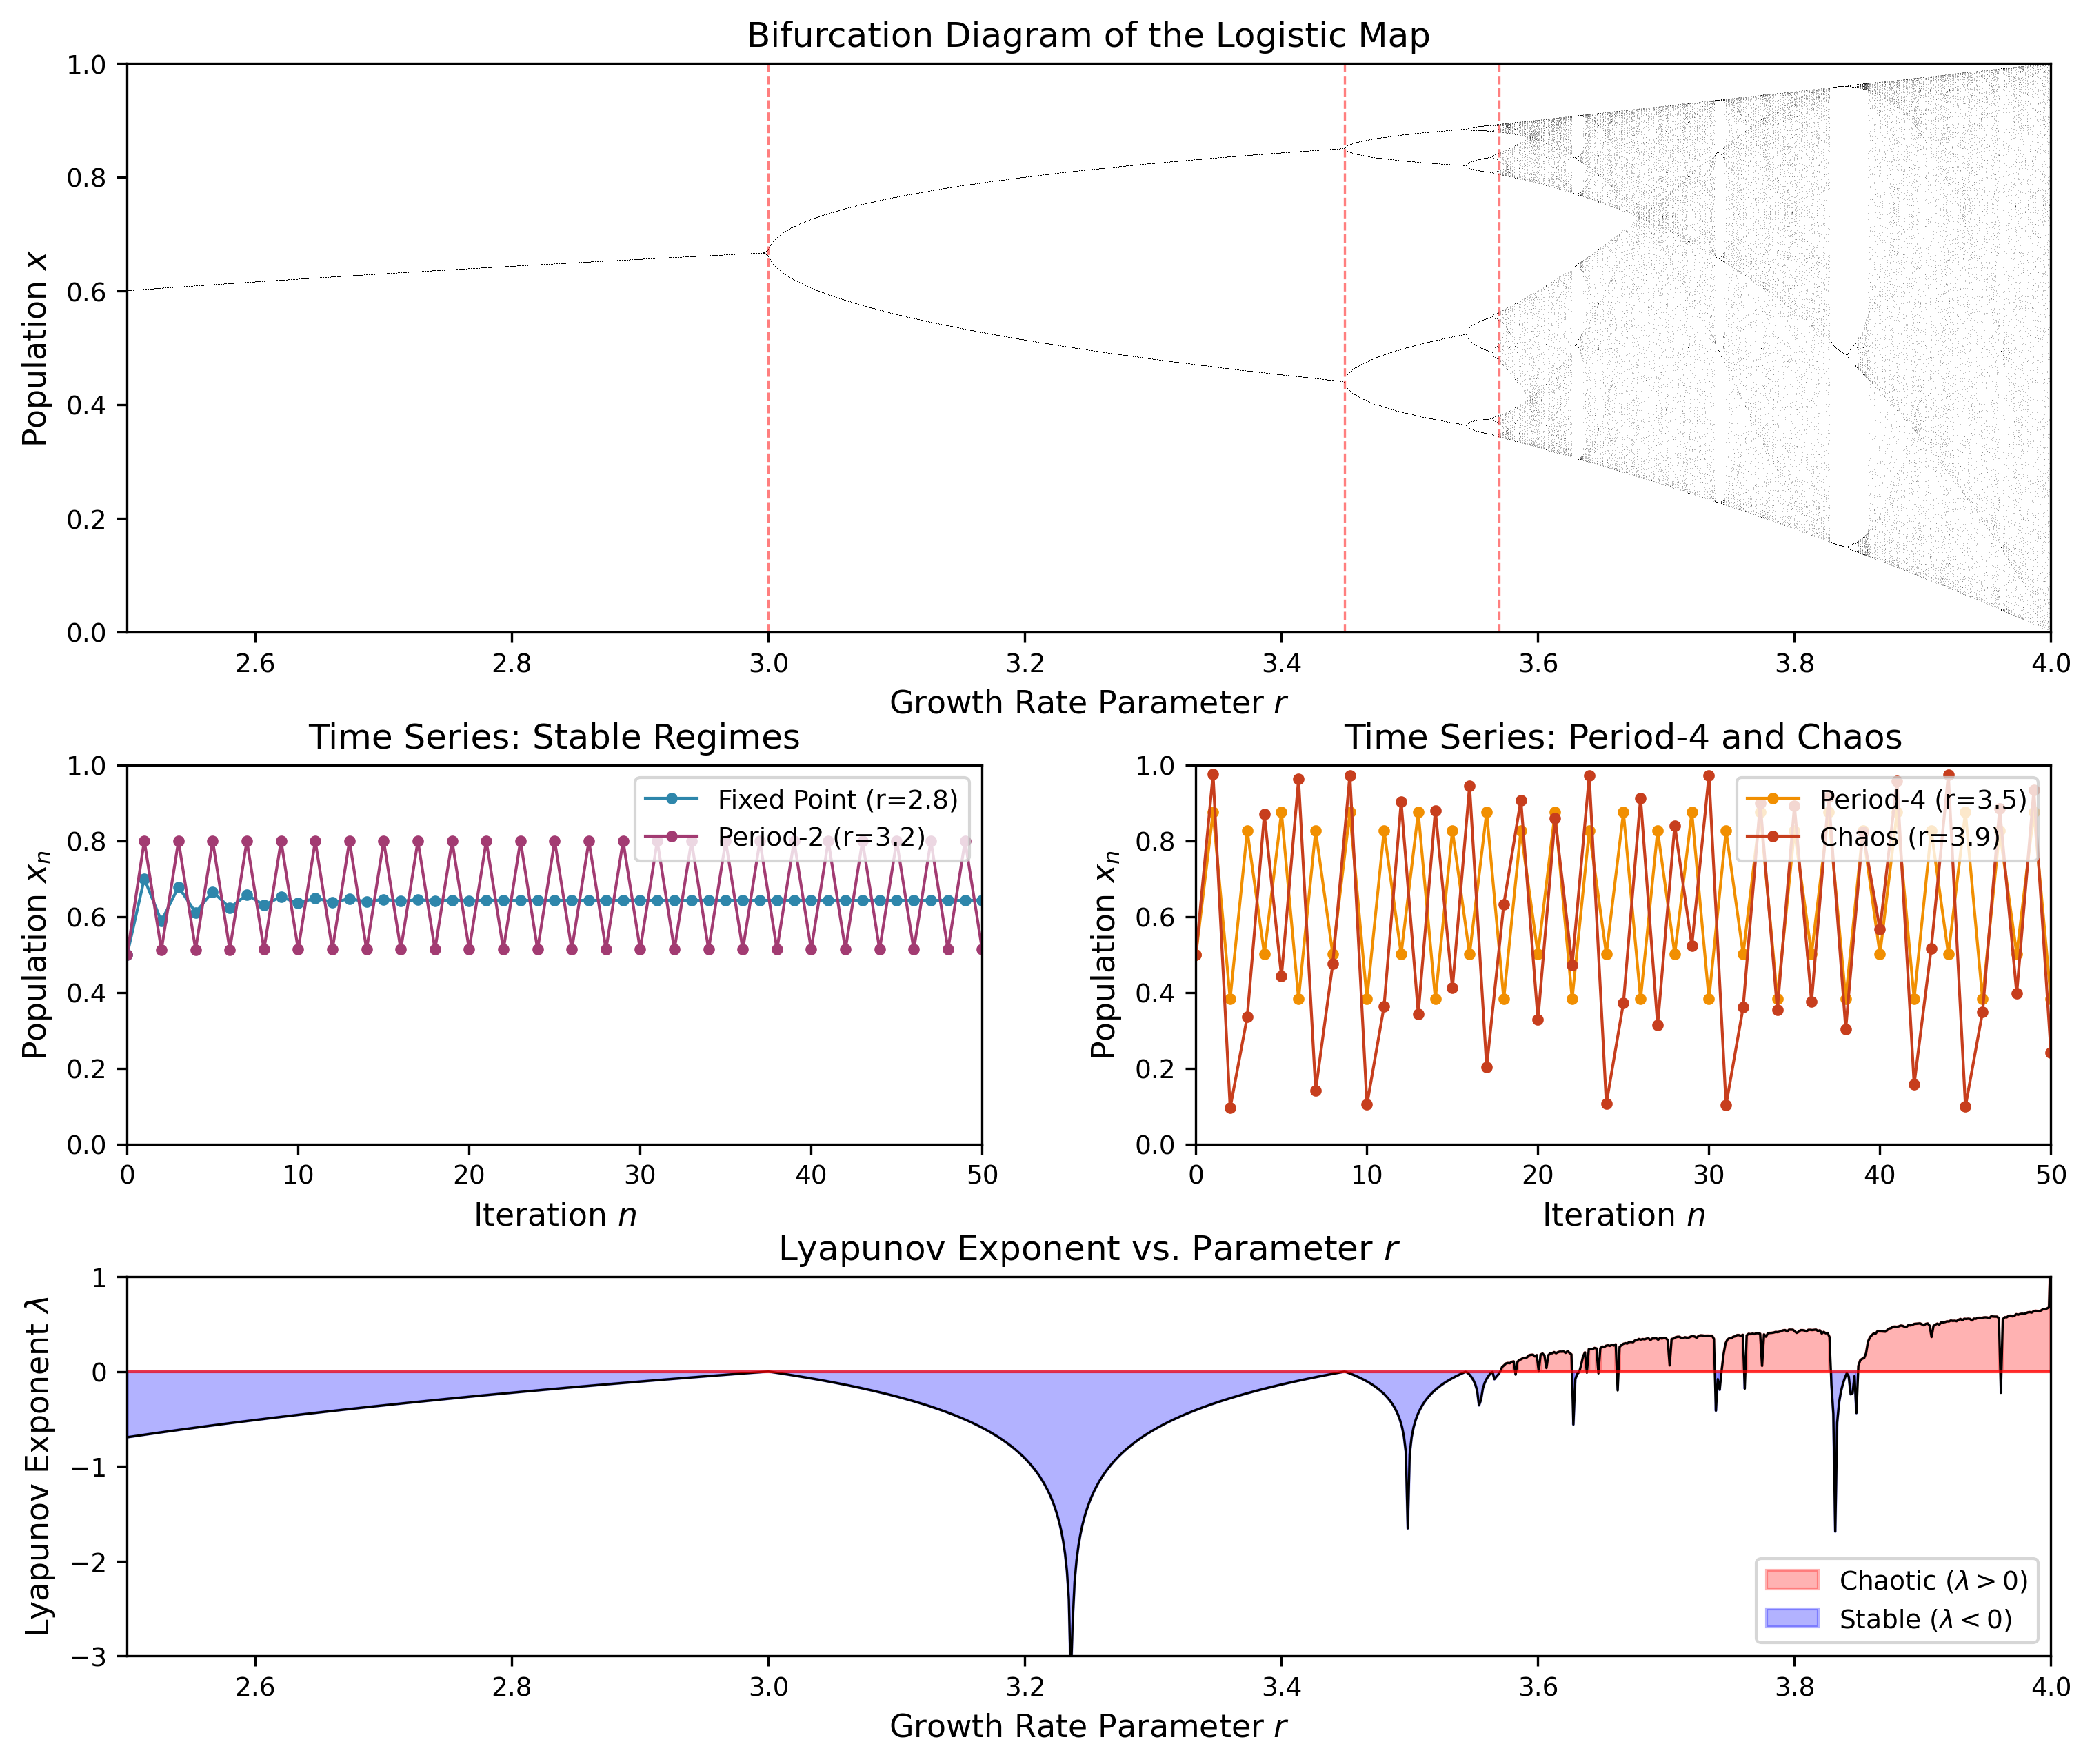

In [6]:
# Create comprehensive figure
fig = plt.figure(figsize=(12, 10))
gs = GridSpec(3, 2, figure=fig, height_ratios=[1.5, 1, 1], hspace=0.3, wspace=0.25)

# Bifurcation diagram (top, spanning both columns)
ax_bif = fig.add_subplot(gs[0, :])
ax_bif.plot(r_vals, x_vals, ',k', alpha=0.25, markersize=0.5)
ax_bif.set_xlabel('Growth Rate Parameter $r$')
ax_bif.set_ylabel('Population $x$')
ax_bif.set_title('Bifurcation Diagram of the Logistic Map')
ax_bif.set_xlim(2.5, 4.0)
ax_bif.set_ylim(0, 1)

# Mark key bifurcation points
bifurcation_points = [
    (3.0, 'Period-2'),
    (3.449, 'Period-4'),
    (3.5699, 'Chaos')
]
for r_bif, label in bifurcation_points:
    ax_bif.axvline(r_bif, color='red', linestyle='--', alpha=0.5, linewidth=0.8)

# Time series plots
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
ax_ts1 = fig.add_subplot(gs[1, 0])
ax_ts2 = fig.add_subplot(gs[1, 1])

time_steps = np.arange(101)
series_list = list(time_series_data.items())

# First two time series
for i, (name, series) in enumerate(series_list[:2]):
    ax_ts1.plot(time_steps[:51], series[:51], '-o', 
                color=colors[i], markersize=3, linewidth=1, label=name)
ax_ts1.set_xlabel('Iteration $n$')
ax_ts1.set_ylabel('Population $x_n$')
ax_ts1.set_title('Time Series: Stable Regimes')
ax_ts1.legend(loc='upper right')
ax_ts1.set_xlim(0, 50)
ax_ts1.set_ylim(0, 1)

# Last two time series
for i, (name, series) in enumerate(series_list[2:]):
    ax_ts2.plot(time_steps[:51], series[:51], '-o', 
                color=colors[i+2], markersize=3, linewidth=1, label=name)
ax_ts2.set_xlabel('Iteration $n$')
ax_ts2.set_ylabel('Population $x_n$')
ax_ts2.set_title('Time Series: Period-4 and Chaos')
ax_ts2.legend(loc='upper right')
ax_ts2.set_xlim(0, 50)
ax_ts2.set_ylim(0, 1)

# Lyapunov exponent (bottom, spanning both columns)
ax_lyap = fig.add_subplot(gs[2, :])
ax_lyap.plot(r_lyap, lyap_exponents, 'k-', linewidth=0.8)
ax_lyap.axhline(0, color='red', linestyle='-', linewidth=1, alpha=0.7)
ax_lyap.fill_between(r_lyap, lyap_exponents, 0, 
                      where=(lyap_exponents > 0), 
                      color='red', alpha=0.3, label='Chaotic ($\\lambda > 0$)')
ax_lyap.fill_between(r_lyap, lyap_exponents, 0, 
                      where=(lyap_exponents < 0), 
                      color='blue', alpha=0.3, label='Stable ($\\lambda < 0$)')
ax_lyap.set_xlabel('Growth Rate Parameter $r$')
ax_lyap.set_ylabel('Lyapunov Exponent $\\lambda$')
ax_lyap.set_title('Lyapunov Exponent vs. Parameter $r$')
ax_lyap.set_xlim(2.5, 4.0)
ax_lyap.set_ylim(-3, 1)
ax_lyap.legend(loc='lower right')

plt.tight_layout()

# Save figure
plt.savefig('logistic_map_chaos_simulation_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
print("Figure saved to plot.png")

plt.show()

## Discussion

### Key Observations

1. **Period-Doubling Cascade**: As $r$ increases past 3, the system undergoes successive period-doubling bifurcations. The ratio of successive bifurcation intervals converges to the Feigenbaum constant $\delta \approx 4.669$.

2. **Onset of Chaos**: At $r \approx 3.5699$ (the Feigenbaum point), the system enters a chaotic regime where the behavior becomes aperiodic and sensitively dependent on initial conditions.

3. **Periodic Windows**: Within the chaotic regime, there exist "windows" of periodic behavior. The most prominent is the period-3 window near $r \approx 3.83$.

4. **Lyapunov Exponent Signature**: The transition to chaos is clearly marked by the Lyapunov exponent crossing zero from negative to positive values.

### Physical Significance

The logistic map demonstrates that deterministic systems can exhibit unpredictable behavior—a cornerstone of chaos theory. This has profound implications for:

- **Population ecology**: Understanding population crashes and boom-bust cycles
- **Economics**: Modeling market dynamics and business cycles
- **Physics**: Studying turbulence, laser dynamics, and dripping faucets

### Universality

The Feigenbaum constants are **universal**—they appear in any unimodal map undergoing period-doubling bifurcations. This universality connects diverse physical systems through the mathematics of nonlinear dynamics.

## References

1. May, R. M. (1976). Simple mathematical models with very complicated dynamics. *Nature*, 261(5560), 459-467.

2. Feigenbaum, M. J. (1978). Quantitative universality for a class of nonlinear transformations. *Journal of Statistical Physics*, 19(1), 25-52.

3. Strogatz, S. H. (2015). *Nonlinear Dynamics and Chaos* (2nd ed.). Westview Press.